In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy.linalg as la

from data import *
from models import *


# Below snippit taken from PyTorch quickstart tutorial
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [2]:
pause_lengths = np.arange(25, 51, 5)
model_rank2= RNN(rank=2)

print("Rank 2 training")
for pl in pause_lengths:
    print("Pause length: ", pl)
    p_data = ParametricDataset(32000, pause=pl)
    train_dataloader = DataLoader(p_data, batch_size=32)
    train(train_dataloader, model_rank2, device)

print("Rank 1 training")
model_rank1 = RNN(rank=1)

s_data = SingleDecisionDataset(32000)
train_dataloader = DataLoader(s_data, batch_size=32)
train(train_dataloader, model_rank1, device)


Rank 2 training
Pause length:  25
loss: 0.188577  [   32/32000]
loss: 0.115705  [ 3232/32000]
loss: 0.134121  [ 6432/32000]
loss: 0.127557  [ 9632/32000]
loss: 0.130870  [12832/32000]
loss: 0.102407  [16032/32000]
loss: 0.026104  [19232/32000]
loss: 0.029341  [22432/32000]
loss: 0.022192  [25632/32000]
loss: 0.018696  [28832/32000]
Pause length:  30
loss: 0.022402  [   32/32000]
loss: 0.010764  [ 3232/32000]
loss: 0.008765  [ 6432/32000]
loss: 0.003093  [ 9632/32000]
loss: 0.003513  [12832/32000]
loss: 0.003131  [16032/32000]
loss: 0.001792  [19232/32000]
loss: 0.001217  [22432/32000]
loss: 0.001234  [25632/32000]
loss: 0.000960  [28832/32000]
Pause length:  35
loss: 0.004005  [   32/32000]
loss: 0.001099  [ 3232/32000]
loss: 0.000676  [ 6432/32000]
loss: 0.001138  [ 9632/32000]
loss: 0.000773  [12832/32000]
loss: 0.000538  [16032/32000]
loss: 0.000886  [19232/32000]
loss: 0.000715  [22432/32000]
loss: 0.000820  [25632/32000]
loss: 0.001147  [28832/32000]
Pause length:  40
loss: 0.0066

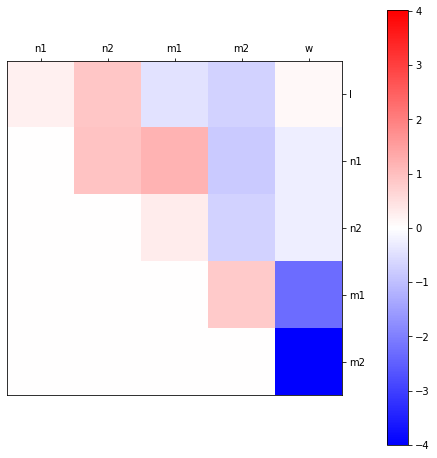

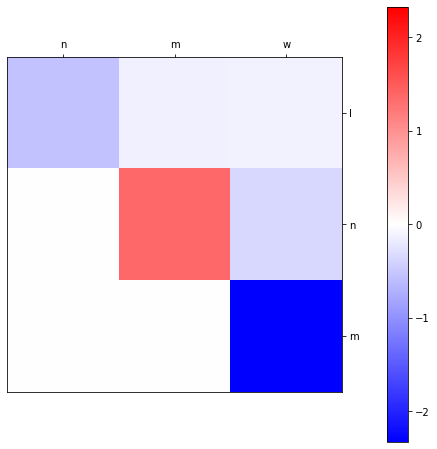

In [3]:
from plotter import visCov, visITO,visUA,visWP
visCov(model_rank2)
visCov(model_rank1)

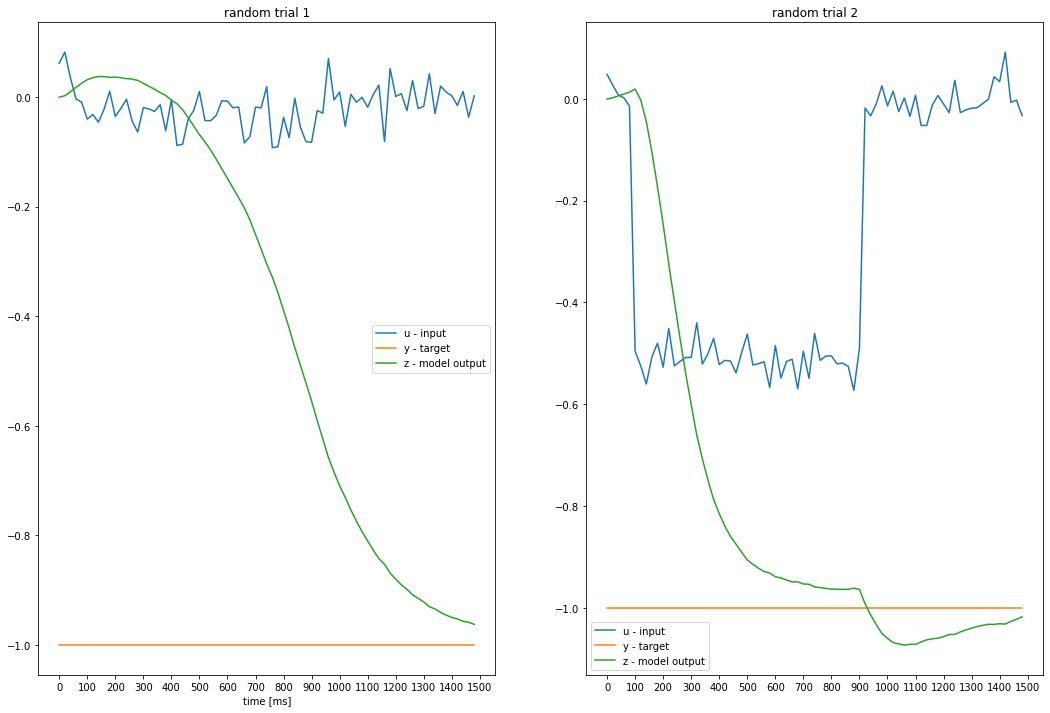

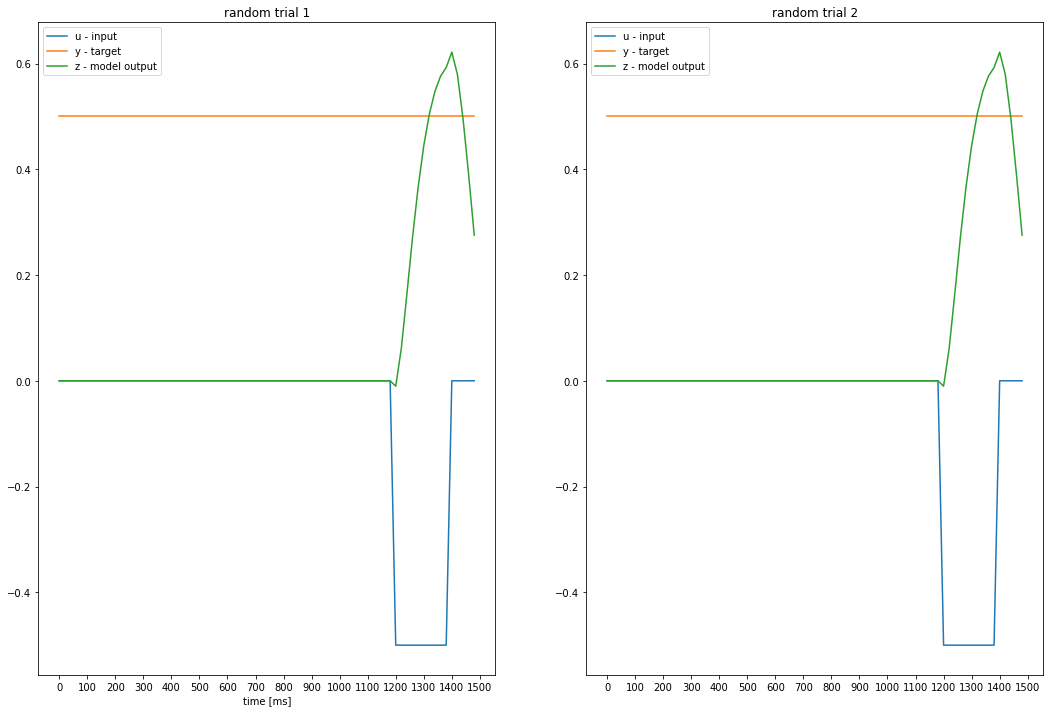

In [4]:
visITO(SingleDecisionDataset, model_rank1)
visITO(ParametricDataset, model_rank2)

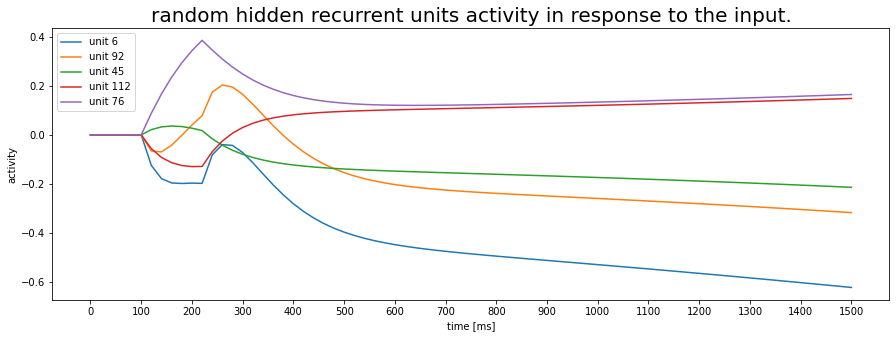

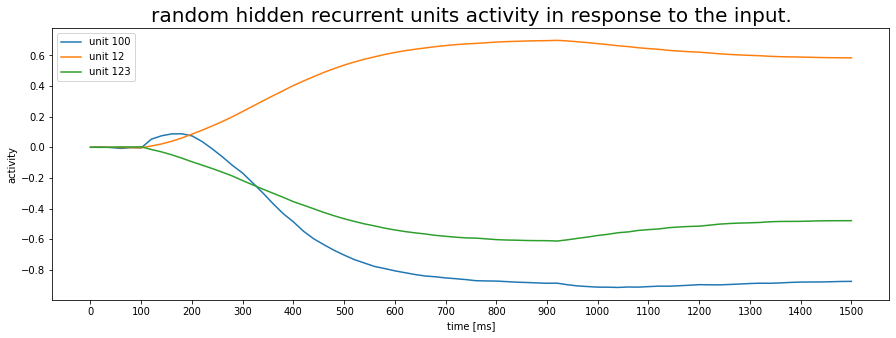

In [5]:
visUA(ParametricDataset, model_rank2)
visUA(SingleDecisionDataset, model_rank1)


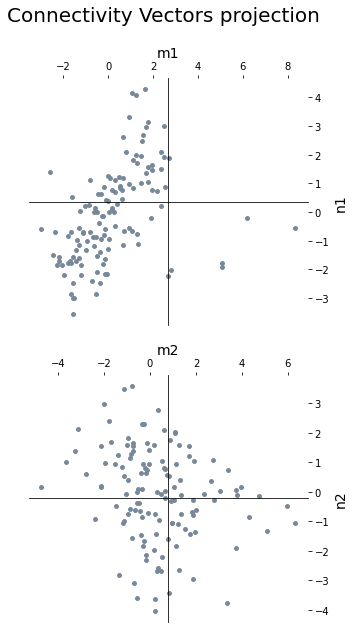

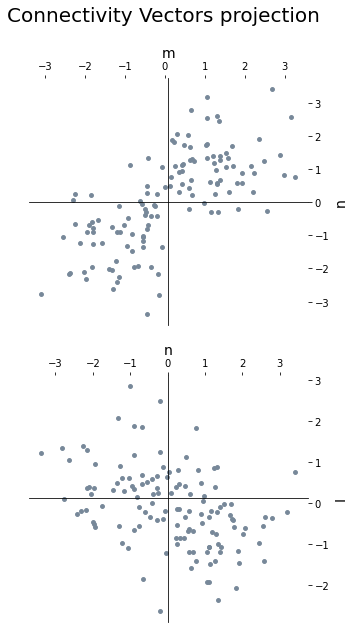

In [6]:
visWP(model_rank2)
visWP(model_rank1)

idx, k, delta, gauss_int
idx, k, delta, gauss_int


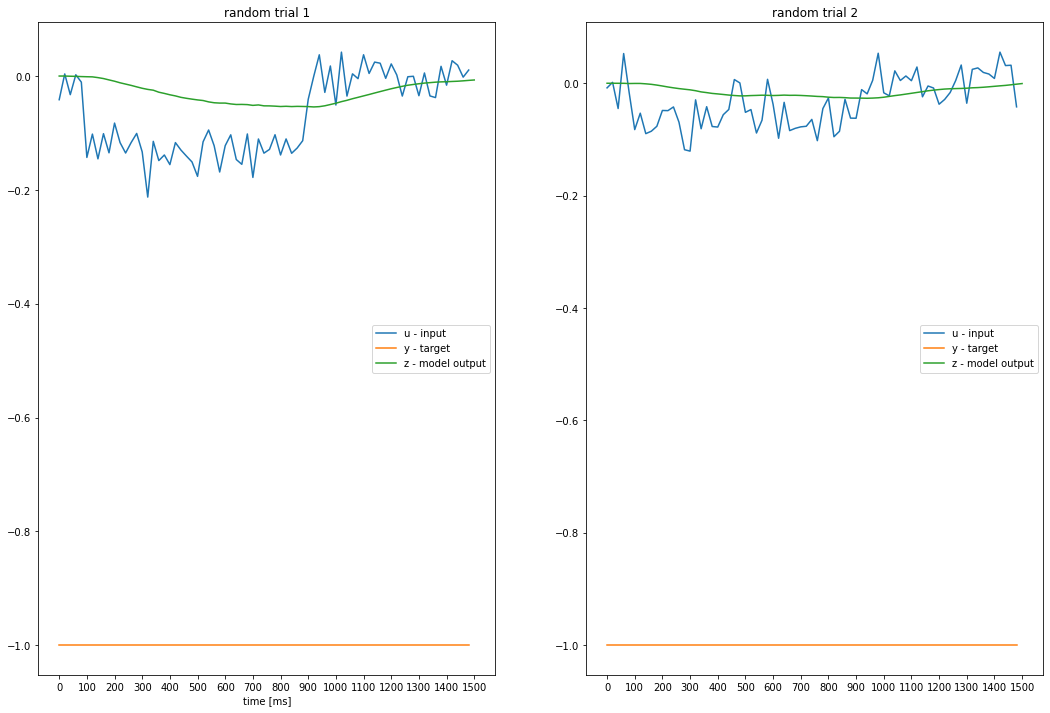

idx, k, delta, gauss_int
idx, k, delta, gauss_int


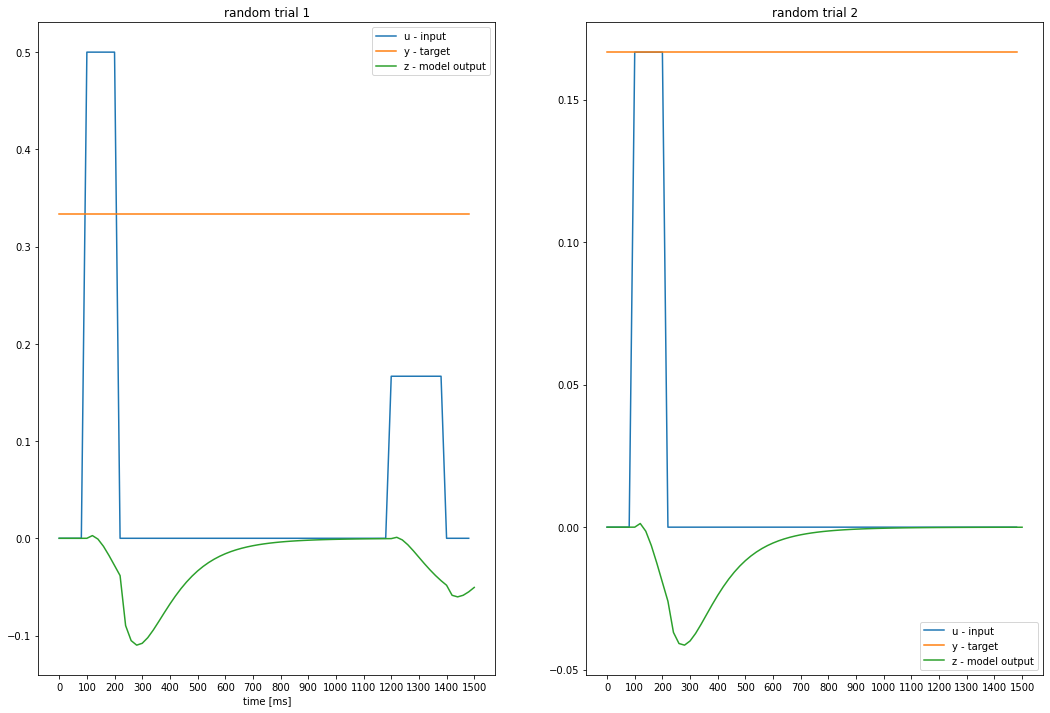

In [7]:
#check the equivalent one, two dimensional models
onedmodel= OneDimEquivalent(model_rank1)
twomodel= TwoDimEquivalent(model_rank2)

d1=SingleDecisionDataset(1)
d2=ParametricDataset(1)

visITO(SingleDecisionDataset, onedmodel)
visITO(ParametricDataset, twomodel)

